In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno as msno
import sklearn
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split


from sklearn.metrics import (accuracy_score, 
                            classification_report,
                            recall_score, precision_score, f1_score,
                            confusion_matrix)

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold

from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import f1_score


from sklearn.svm import SVC


In [2]:
# loading in the data
df = pd.read_csv('salaries.csv')

<div style="background-color: #8DC4C2; padding: 10px; border-radius: 5px;">
    <h1 style="font-weight: bold; color: blackbold; color: Black;">Exploratory Data Analysis</h1>
</div>

In [3]:
df.head()

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,NaN,NaN,Widowed,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,NaN,NaN,Widowed,White,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,NaN,Never married,Black,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,NaN,NaN,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,...,India,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1580.79,Below limit


In [4]:
df.shape

(209499, 43)

In [5]:
df.columns

Index(['ID', 'age', 'gender', 'education', 'class', 'education_institute',
       'marital_status', 'race', 'is_hispanic', 'employment_commitment',
       'unemployment_reason', 'employment_stat', 'wage_per_hour',
       'is_labor_union', 'working_week_per_year', 'industry_code',
       'industry_code_main', 'occupation_code', 'occupation_code_main',
       'total_employed', 'household_stat', 'household_summary',
       'under_18_family', 'veterans_admin_questionnaire', 'vet_benefit',
       'tax_status', 'gains', 'losses', 'stocks_status', 'citizenship',
       'mig_year', 'country_of_birth_own', 'country_of_birth_father',
       'country_of_birth_mother', 'migration_code_change_in_msa',
       'migration_prev_sunbelt', 'migration_code_move_within_reg',
       'migration_code_change_in_reg', 'residence_1_year_ago',
       'old_residence_reg', 'old_residence_state', 'importance_of_record',
       'income_above_limit'],
      dtype='object')

In [6]:
for i in df.columns:
    print(f"Unique value in {i}:")
    print(df[i].unique(),'\n')

Unique value in ID:
['ID_TZ0000' 'ID_TZ0001' 'ID_TZ0002' ... 'ID_TZ99997' 'ID_TZ99998'
 'ID_TZ99999'] 

Unique value in age:
[79 65 21  2 70 45 53 22 73 30  4 16 43 36  5 88 40 47 59 69 50 27 39 85
 29 41 14 33 67 52 11  9 13 19 26 23 37 58 63 46 62 28 31  3 18 78 15 38
  7 35  1 20  0 48 24 56 25  8 66 71 32 75 51 10 44 42 55 74 77 34 80 17
 83 86 12 68 60 57 64 72 90 61 82  6 84 49 76 54 89 81 87] 

Unique value in gender:
[' Female' ' Male'] 

Unique value in education:
[' High school graduate' ' 12th grade no diploma' ' Children'
 ' Bachelors degree(BA AB BS)' ' 7th and 8th grade' ' 11th grade'
 ' 9th grade' ' Masters degree(MA MS MEng MEd MSW MBA)' ' 10th grade'
 ' Associates degree-academic program' ' 1st 2nd 3rd or 4th grade'
 ' Some college but no degree' ' Less than 1st grade'
 ' Associates degree-occup /vocational'
 ' Prof school degree (MD DDS DVM LLB JD)' ' 5th or 6th grade'
 ' Doctorate degree(PhD EdD)'] 

Unique value in class:
[nan ' Federal government' ' Private' ' Loca

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209499 entries, 0 to 209498
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              209499 non-null  object 
 1   age                             209499 non-null  int64  
 2   gender                          209499 non-null  object 
 3   education                       209499 non-null  object 
 4   class                           104254 non-null  object 
 5   education_institute             13302 non-null   object 
 6   marital_status                  209499 non-null  object 
 7   race                            209499 non-null  object 
 8   is_hispanic                     209499 non-null  object 
 9   employment_commitment           209499 non-null  object 
 10  unemployment_reason             6520 non-null    object 
 11  employment_stat                 209499 non-null  int64  
 12  wage_per_hour   

In [8]:
# let's take a look at the target column
df['income_above_limit'].unique()

array(['Below limit', 'Above limit'], dtype=object)

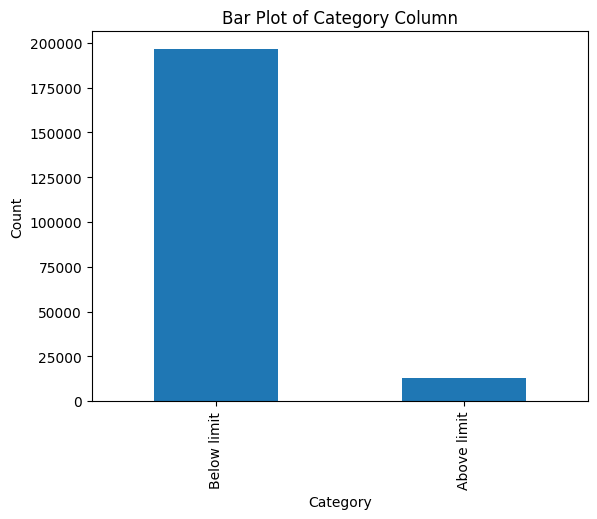

In [9]:
# checking out the target column in more detail
# note that we can see that the data set is imbalanced 
df['income_above_limit'].value_counts().plot(kind='bar')

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Bar Plot of Category Column')
plt.show()




<div style="background-color: #8DC4C2; padding: 10px; border-radius: 5px;">
    <h2 style="color: Black;">Initial Thoughts</h1>
    <p style="color: black;">  </p>
    <p style="color: black;">- the target class is imbalanced </p>
    <p style="color: black;">- there are 43 columns and approximately 209.5k rows of data  </p>
    <p style="color: black;">- we're dealing with a lot of categorical data  </p>
    <p style="color: black;">- there are some numerical fields like age but the other numerical columns are technically categories (think of it as label/ordinal encoding already done on the dataset)  </p>
    <p style="color: black;">- there are two values in the target class, making this a binary classification problem </p>
 
   
</div>



<div style="background-color: #8DC4C2; padding: 10px; border-radius: 5px;">
    <h3 style="color: black;">Missing Values and Duplicates</p>
</div>


In [10]:
df.duplicated().sum()

0

- we can see that there are no duplicates in the data set


- on a side note, real world data sets are often messy
- one common problem may be that missing values may not be detected because they can be denoted with other representations that pandas doesn't detect like a question mark or 'na'
- we can try to find special characters like '?' for example so that we can replace it with NaN (this helps us get the correct percentage of missing data in each column)

In [11]:


def detect_and_convert_missing_data(df):
    # defining missing data representations
    missing_data_representations = {'', 'NA', 'N/A', '?', 'NULL', 'NaN', 'NONE'}
    
    missing_data_count = {}
    
    for col in df.columns:
        count = 0
        for index, cell in enumerate(df[col]):
            # Remove leading/trailing whitespaces and convert to uppercase for uniform comparison
            standardized_item = str(cell).strip().upper()
            
            if standardized_item in missing_data_representations:
                count += 1
                # Convert the cell to Pandas default N/A representation (np.nan)
                df.at[index, col] = np.nan
        
        missing_data_count[col] = count
    
    # Calculate and print the percentage of missing data in each column
    total_rows = len(df)
    for col, count in missing_data_count.items():
        percentage_missing = (count / total_rows) * 100
        print(f"Column {col} has {percentage_missing}% missing data. The count is {count}")
        
    return df


# Detect and convert missing data in DataFrame to NaN so we can see the actual data 
df = detect_and_convert_missing_data(df)




Column ID has 0.0% missing data. The count is 0
Column age has 0.0% missing data. The count is 0
Column gender has 0.0% missing data. The count is 0
Column education has 0.0% missing data. The count is 0
Column class has 0.0% missing data. The count is 0
Column education_institute has 0.0% missing data. The count is 0
Column marital_status has 0.0% missing data. The count is 0
Column race has 0.0% missing data. The count is 0
Column is_hispanic has 0.42100439620236846% missing data. The count is 882
Column employment_commitment has 0.0% missing data. The count is 0
Column unemployment_reason has 0.0% missing data. The count is 0
Column employment_stat has 0.0% missing data. The count is 0
Column wage_per_hour has 0.0% missing data. The count is 0
Column is_labor_union has 0.0% missing data. The count is 0
Column working_week_per_year has 0.0% missing data. The count is 0
Column industry_code has 0.0% missing data. The count is 0
Column industry_code_main has 0.0% missing data. The coun

In [12]:
missing_values_info = df.isnull().sum()
missing_values_info

ID                                     0
age                                    0
gender                                 0
education                              0
class                             105245
education_institute               196197
marital_status                         0
race                                   0
is_hispanic                          882
employment_commitment                  0
unemployment_reason               202979
employment_stat                        0
wage_per_hour                          0
is_labor_union                    189420
working_week_per_year                  0
industry_code                          0
industry_code_main                     0
occupation_code                        0
occupation_code_main              105694
total_employed                         0
household_stat                         0
household_summary                      0
under_18_family                   151654
veterans_admin_questionnaire      207415
vet_benefit     

- there seems to be a lot of missing data in some columns
- there are no duplicates in the data set 
- let's look into the missing data using the missingno library 

<AxesSubplot: >

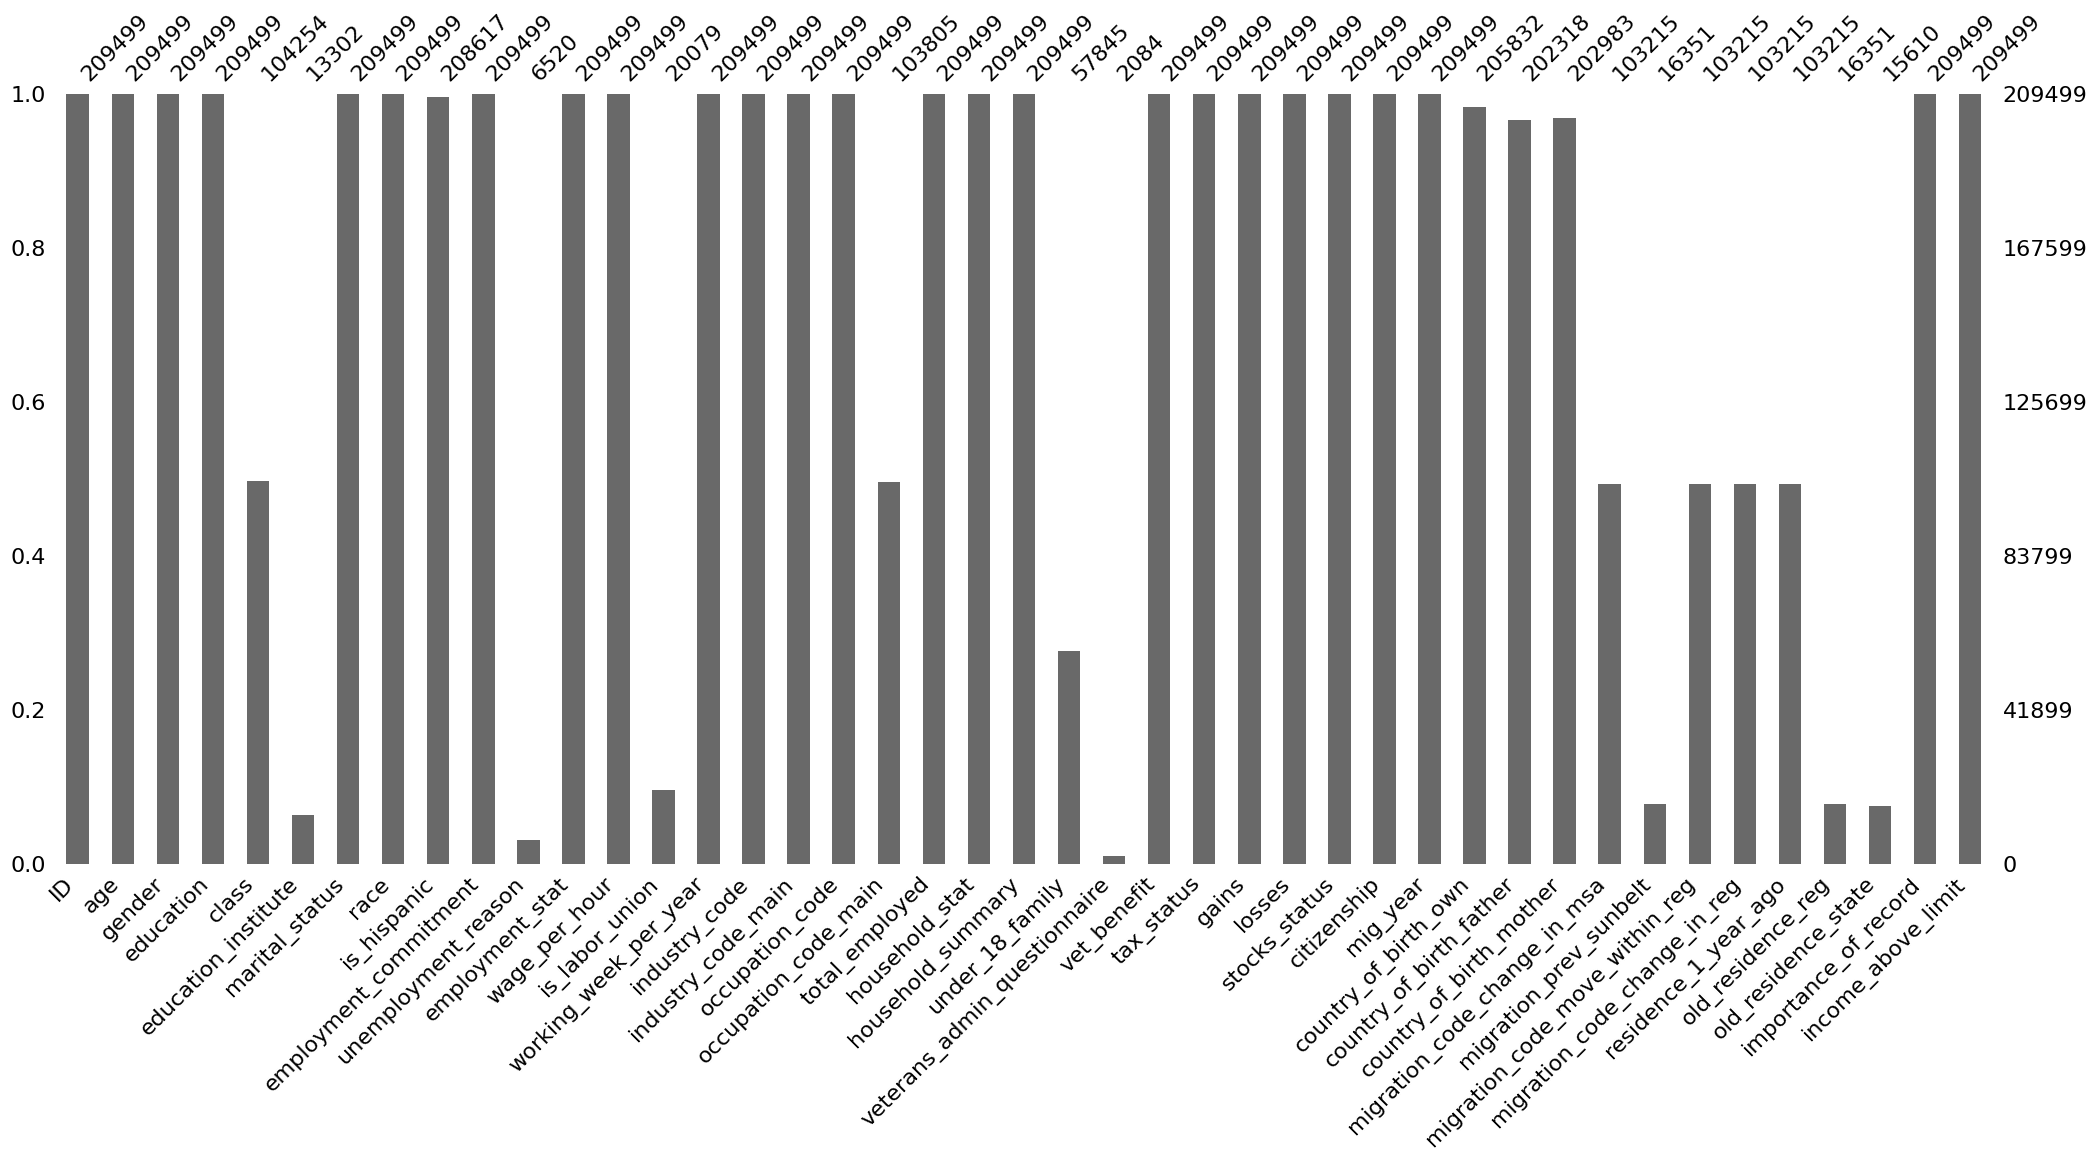

In [13]:
msno.bar(df)

In [14]:
# let's try to approximately quantify the amount of missing data for each column 
missing_values = df.isnull().sum()
percentage = (missing_values*100)/len(df)
missing_data_df = pd.concat([missing_values,percentage],axis=1)
missing_data_df.rename(columns={0: 'missing_data_points', 1: 'percentage of missing data'}, inplace=True)
missing_data_df[missing_data_df['missing_data_points']>0].sort_values(by='percentage of missing data', ascending=False)


,missing_data_points,percentage of missing data
veterans_admin_questionnaire,207415,99.005246
unemployment_reason,202979,96.887813
education_institute,196197,93.650566
old_residence_state,193889,92.548890
old_residence_reg,193148,92.195189
migration_prev_sunbelt,193148,92.195189
is_labor_union,189420,90.415706
under_18_family,151654,72.388890
migration_code_move_within_reg,106284,50.732462
residence_1_year_ago,106284,50.732462





<div style="background-color: #8DC4C2; padding: 10px; border-radius: 5px; color: black;">
    <h3 style="color: black;">Thoughts about Missing Data</h3>
    <ul>
        <li>The percentage of missing data in each column ranges from 0.7% to 99%</li>
        <li>A few columns have a high percentage of missing data</li>
        <li>Most columns have no missing data at all</li>
        <li>It's a better choice to drop the columns with more than 50% of missing data (doesn't make sense to try to impute the missing data)</li>
        <li>It definitely makes sense to impute the data with columns missing less than 1% of data</li>
    </ul>
</div>




In [15]:
df.drop(['veterans_admin_questionnaire', 'unemployment_reason', 
         'education_institute', 'old_residence_reg', 
         'old_residence_state', 'is_labor_union', 'under_18_family',
         'migration_prev_sunbelt','residence_1_year_ago', 'occupation_code_main', 
         'class', 'migration_prev_sunbelt', 'migration_code_change_in_msa', 
         'migration_code_change_in_reg', 'migration_code_move_within_reg' ], axis = 1, inplace = True)

In [16]:
# we can also drop the ID column since we won't be needing it 

df.drop('ID', axis=1, inplace= True)

<AxesSubplot: >

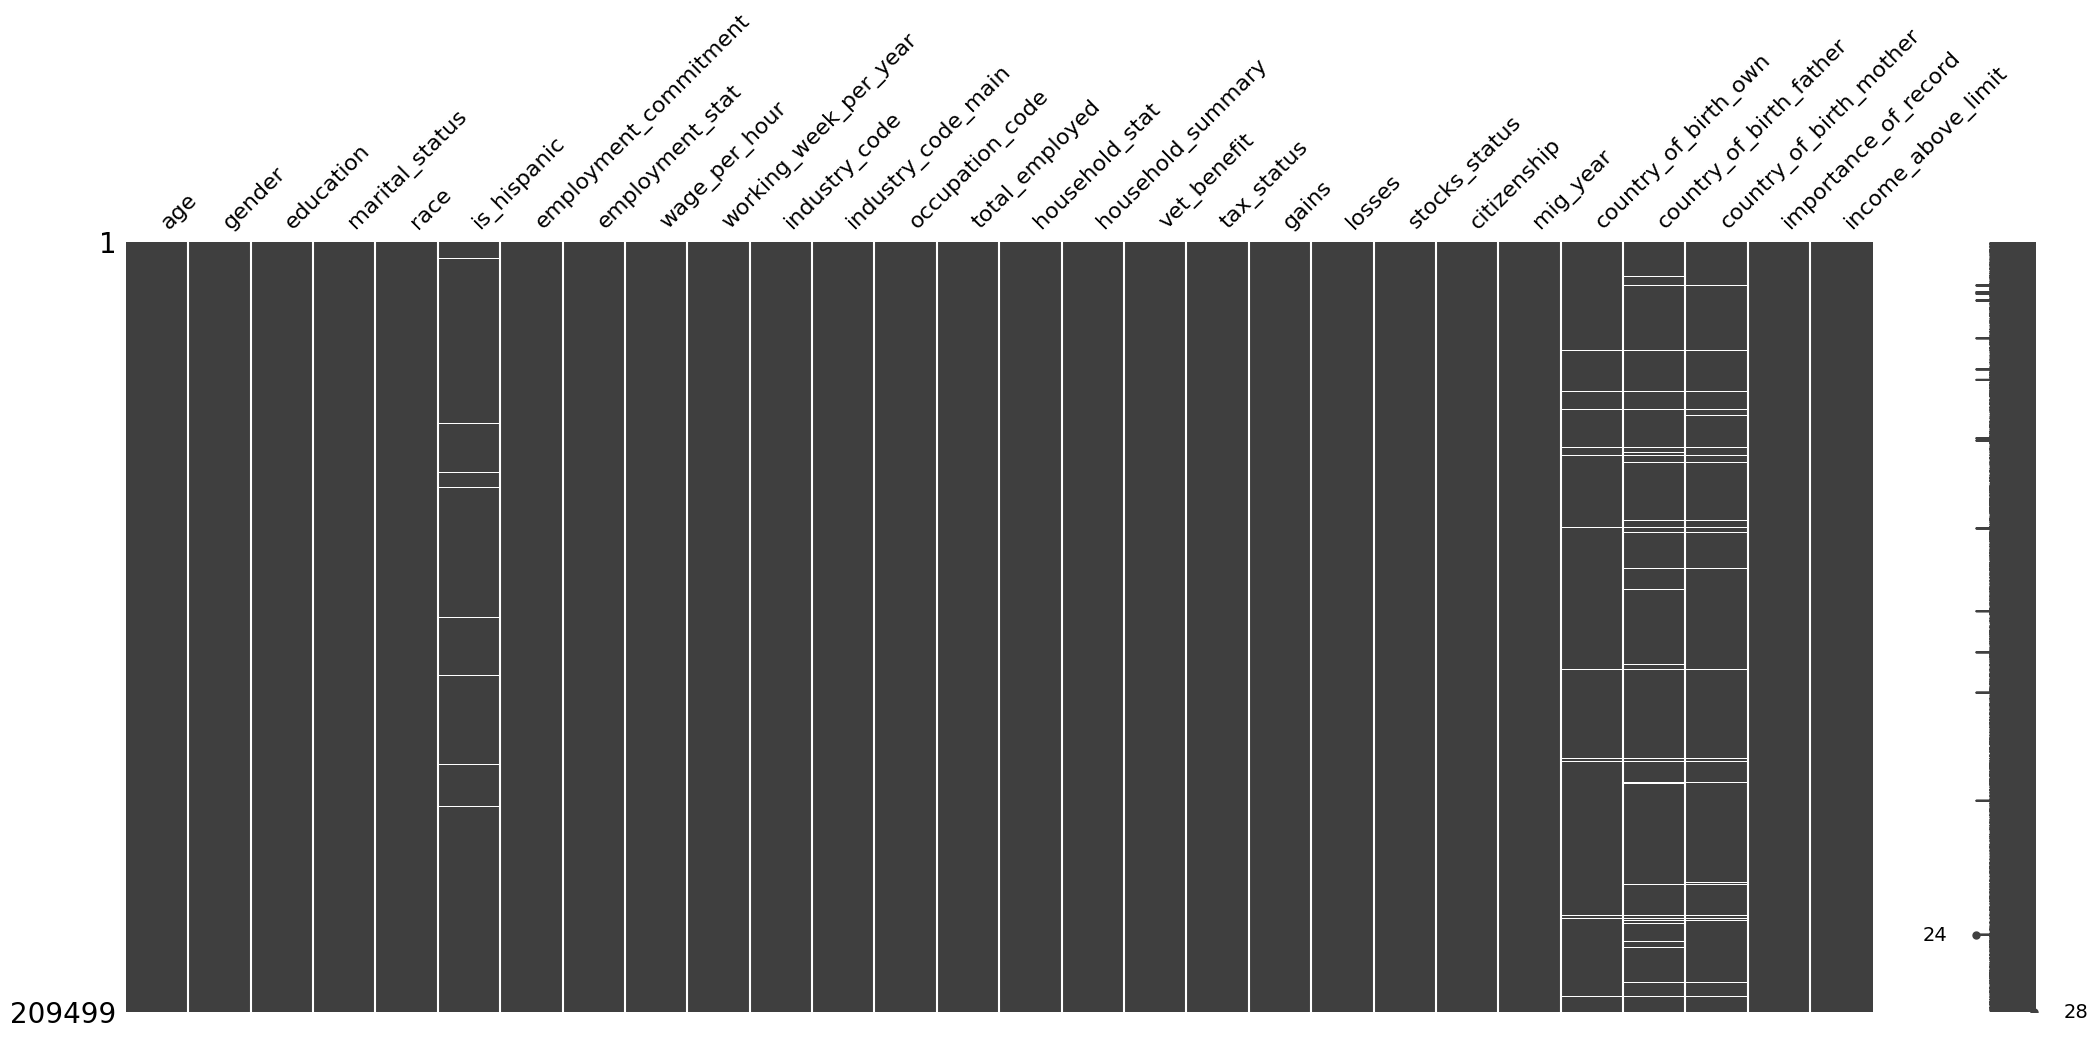

In [17]:
msno.matrix(df)

<div style="background-color: #8DC4C2; padding: 10px; border-radius: 5px;">
    <h1 style="font-weight: bold; color: blackbold; color: Black;">Data Profiling</h1>
</div>

In [18]:
df.describe()

,age,employment_stat,wage_per_hour,working_week_per_year,industry_code,occupation_code,total_employed,vet_benefit,gains,losses,stocks_status,mig_year,importance_of_record
count,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000
mean,34.518728,0.176760,55.433487,23.158850,15.332398,11.321734,1.956067,1.515854,435.926887,36.881737,194.533420,94.499745,1740.888324
std,22.306738,0.555562,276.757327,24.397963,18.049655,14.460839,2.365154,0.850853,4696.359500,270.383302,1956.375501,0.500001,995.559557
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000,37.870000
25%,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,94.000000,1061.290000
50%,33.000000,0.000000,0.000000,8.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,94.000000,1617.040000
75%,50.000000,0.000000,0.000000,52.000000,33.000000,26.000000,4.000000,2.000000,0.000000,0.000000,0.000000,95.000000,2185.480000
max,90.000000,2.000000,9999.000000,52.000000,51.000000,46.000000,6.000000,2.000000,99999.000000,4608.000000,99999.000000,95.000000,18656.300000


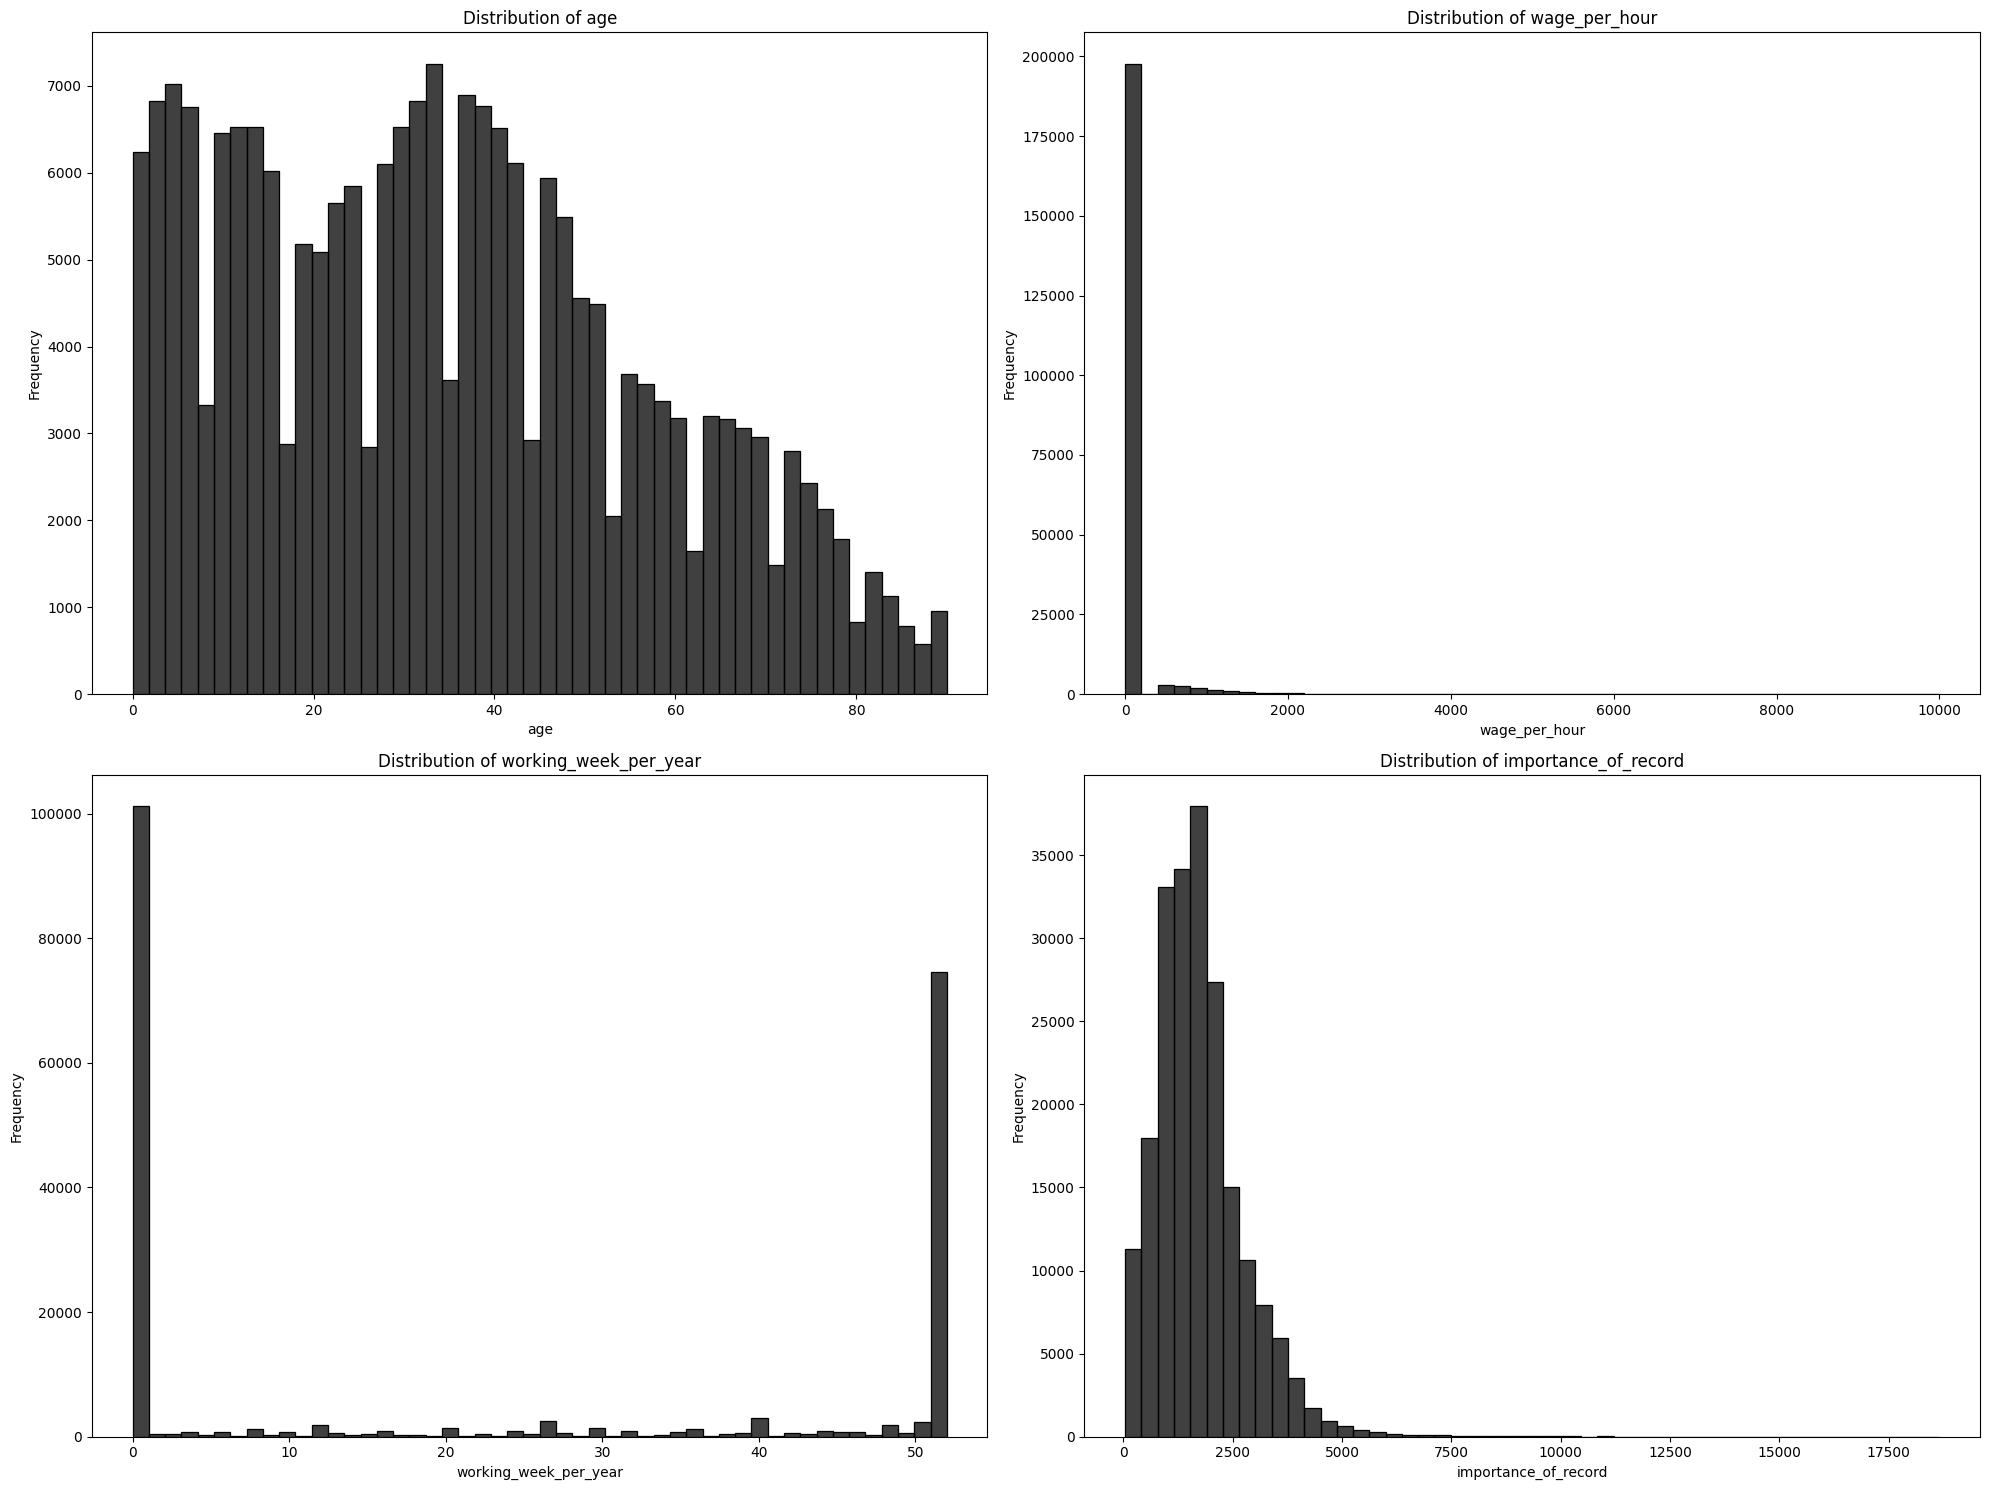

In [19]:
plt.figure(figsize=(20, 15))

# List of numerical columns to plot
num_cols_to_plot = ['age', 'wage_per_hour', 'working_week_per_year', 'importance_of_record']

# Plot histograms
for i, col in enumerate(num_cols_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], bins=50, kde=False, color='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

- a lot of people seem to be making no money per hour
- they could be students/kids 


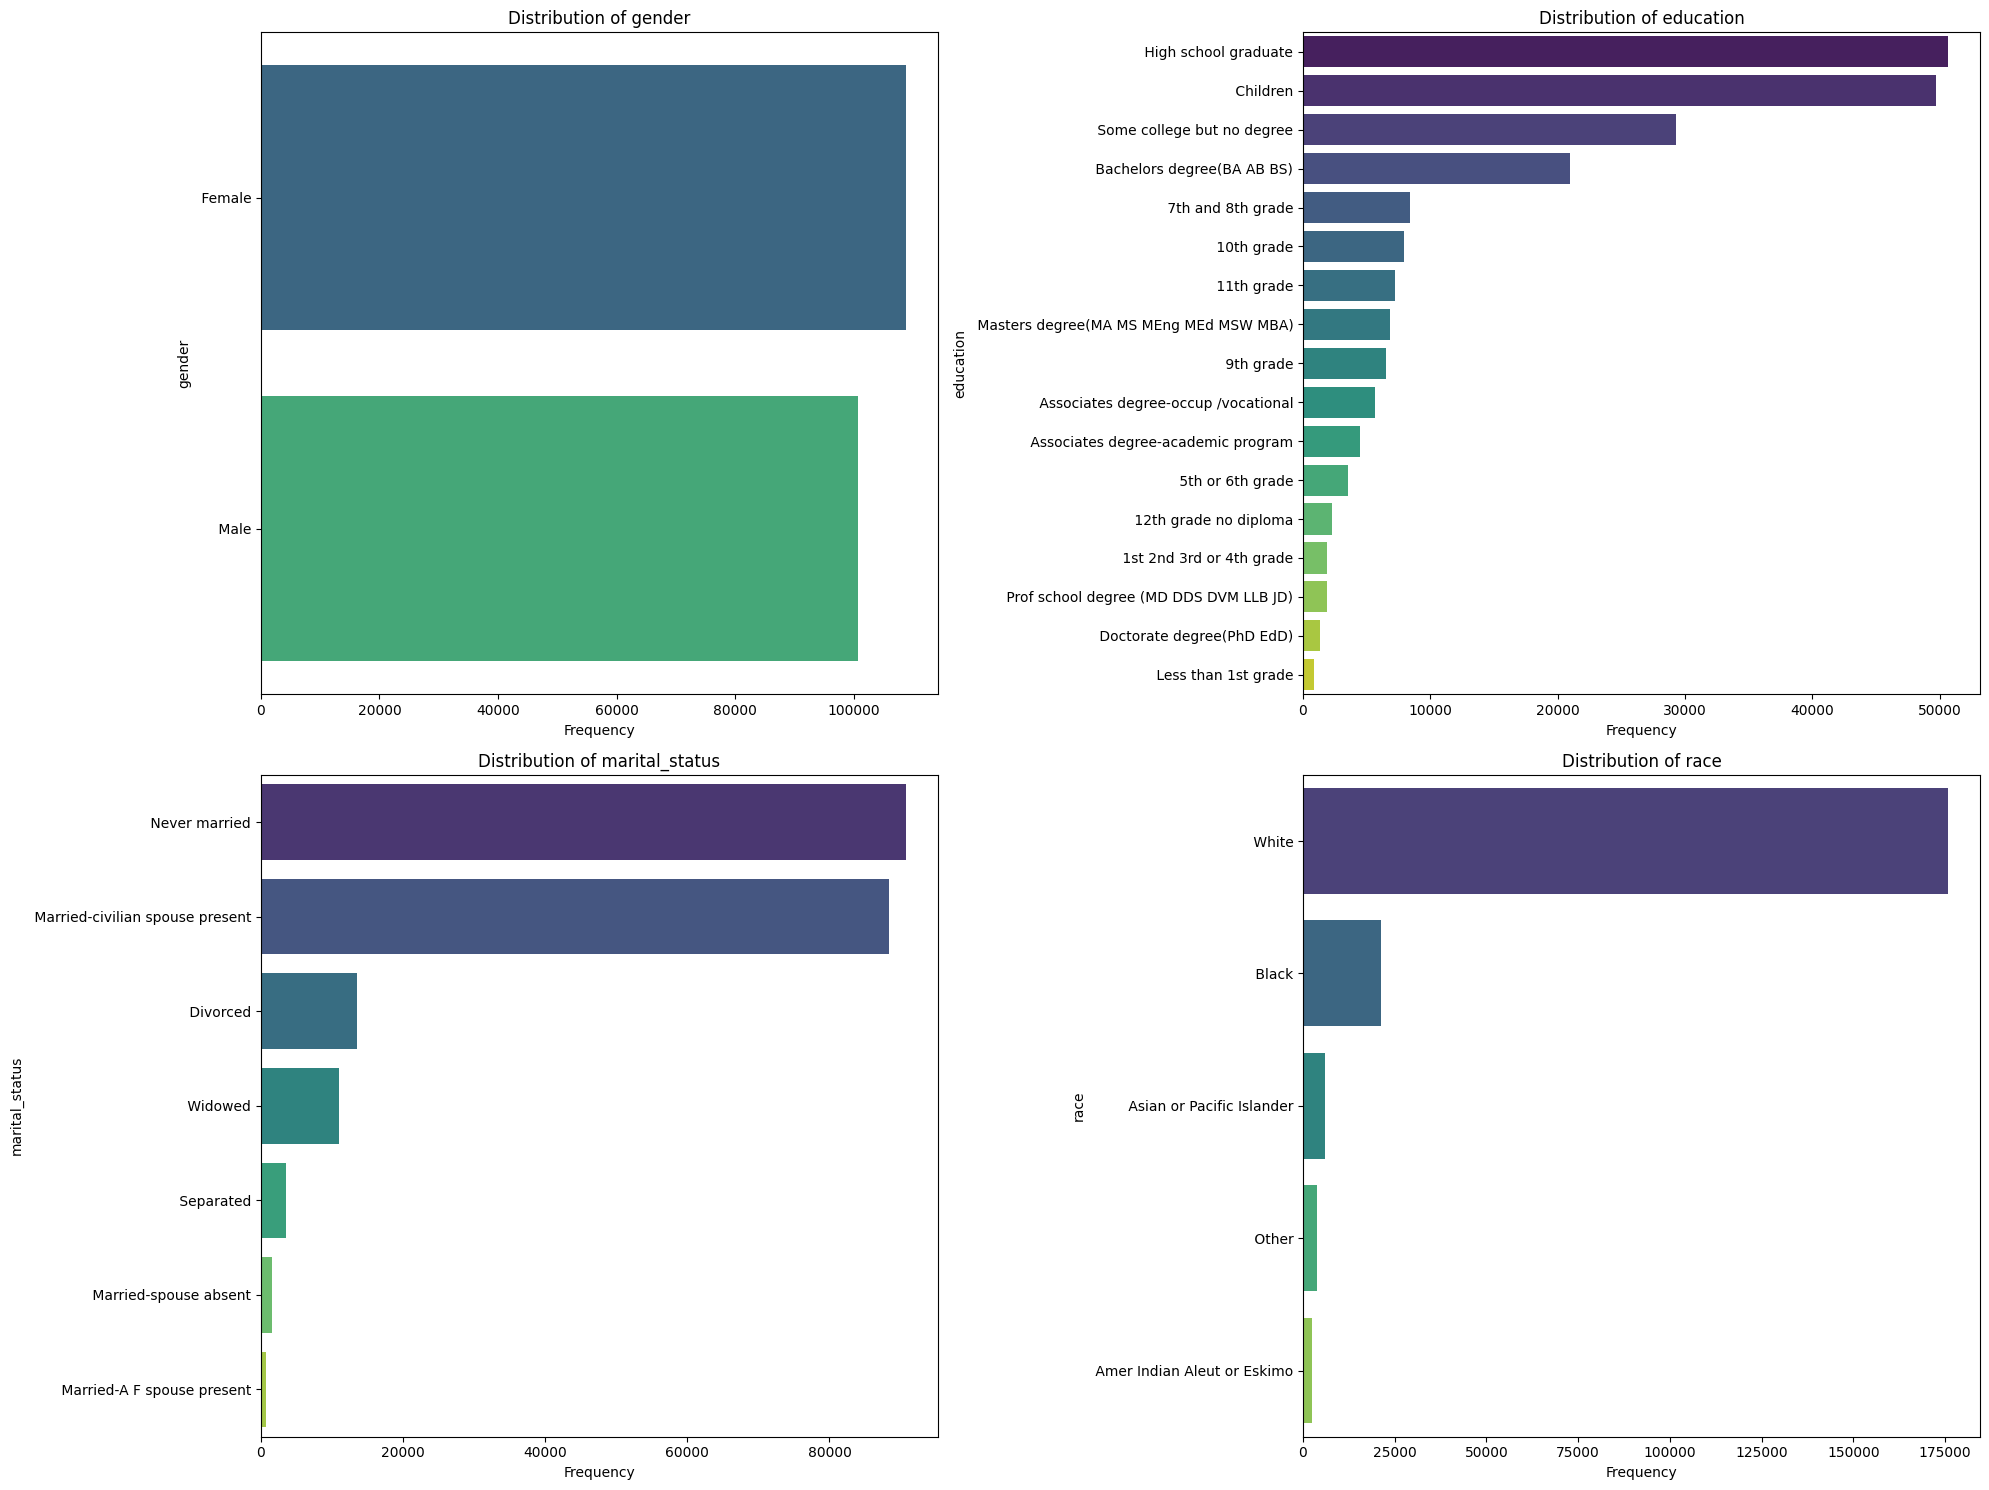

In [20]:
plt.figure(figsize=(20, 15))

# List of categorical columns to plot
cat_cols_to_plot = ['gender', 'education', 'marital_status', 'race']

# Plot bar charts
for i, col in enumerate(cat_cols_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Frequency')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

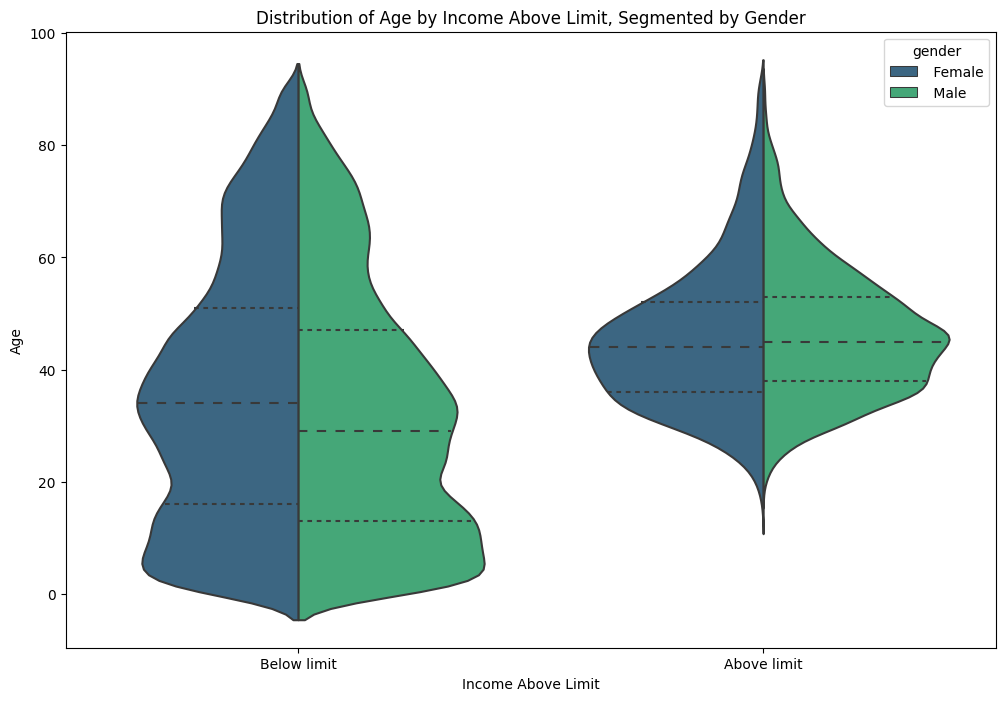

In [21]:
plt.figure(figsize=(12, 8))

# violin plot for age vs income_above_limit, segmented by gender
sns.violinplot(x='income_above_limit', y='age', hue='gender', data=df, split=True, inner="quartile",palette='viridis')

plt.title('Distribution of Age by Income Above Limit, Segmented by Gender')
plt.xlabel('Income Above Limit')
plt.ylabel('Age')

plt.show()

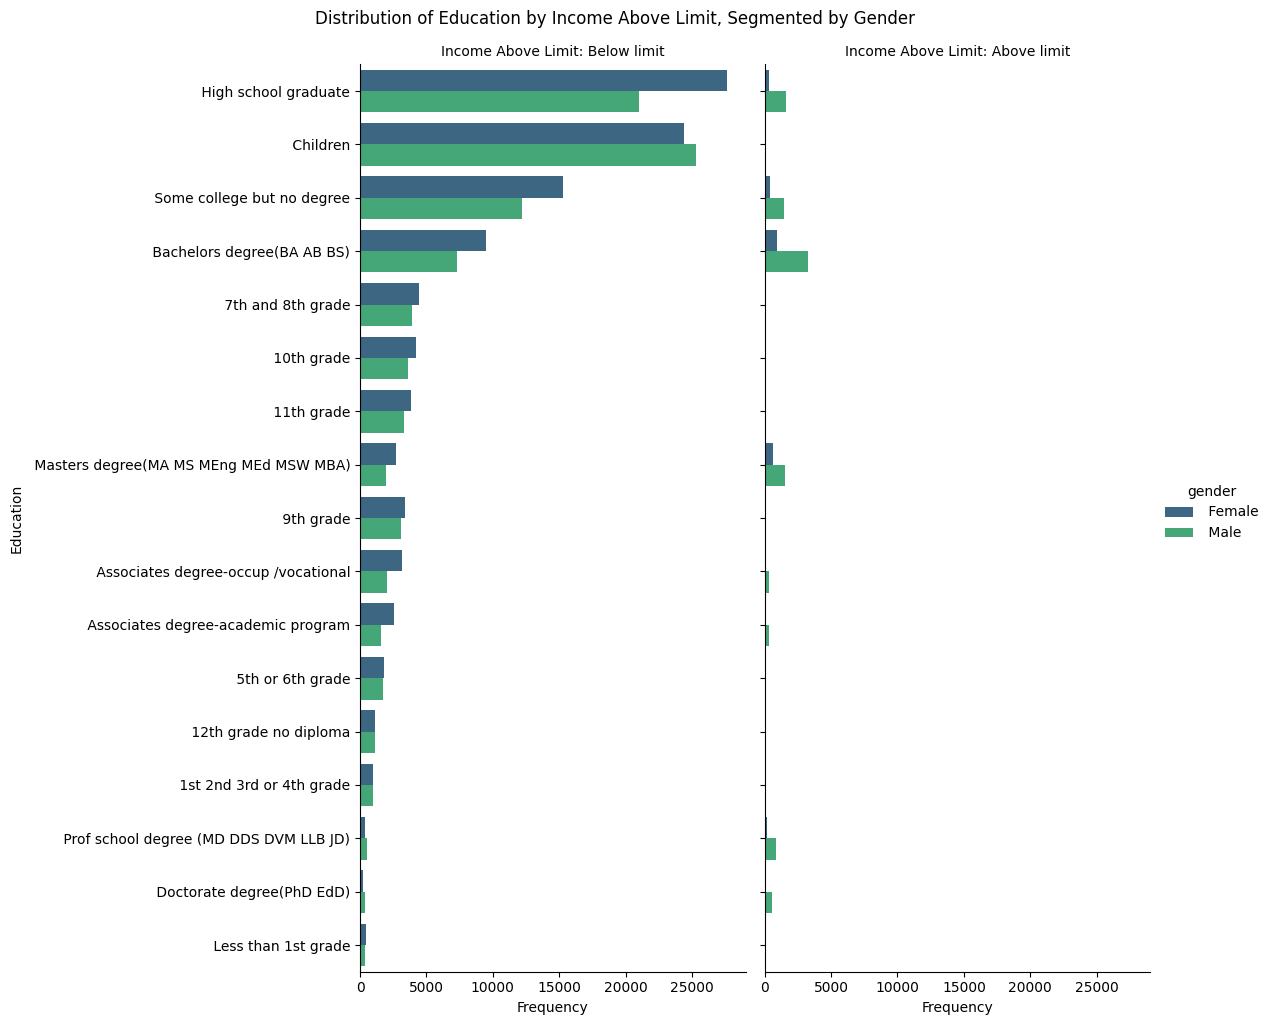

In [22]:
g = sns.catplot(data=df, y='education', hue='gender', col='income_above_limit',
                kind='count', order=df['education'].value_counts().index, 
                palette='viridis', height=10, aspect=0.6)

g.set_axis_labels("Frequency", "Education")
g.set_titles("Income Above Limit: {col_name}")
g.fig.suptitle('Distribution of Education by Income Above Limit, Segmented by Gender', y=1.02)

plt.show()

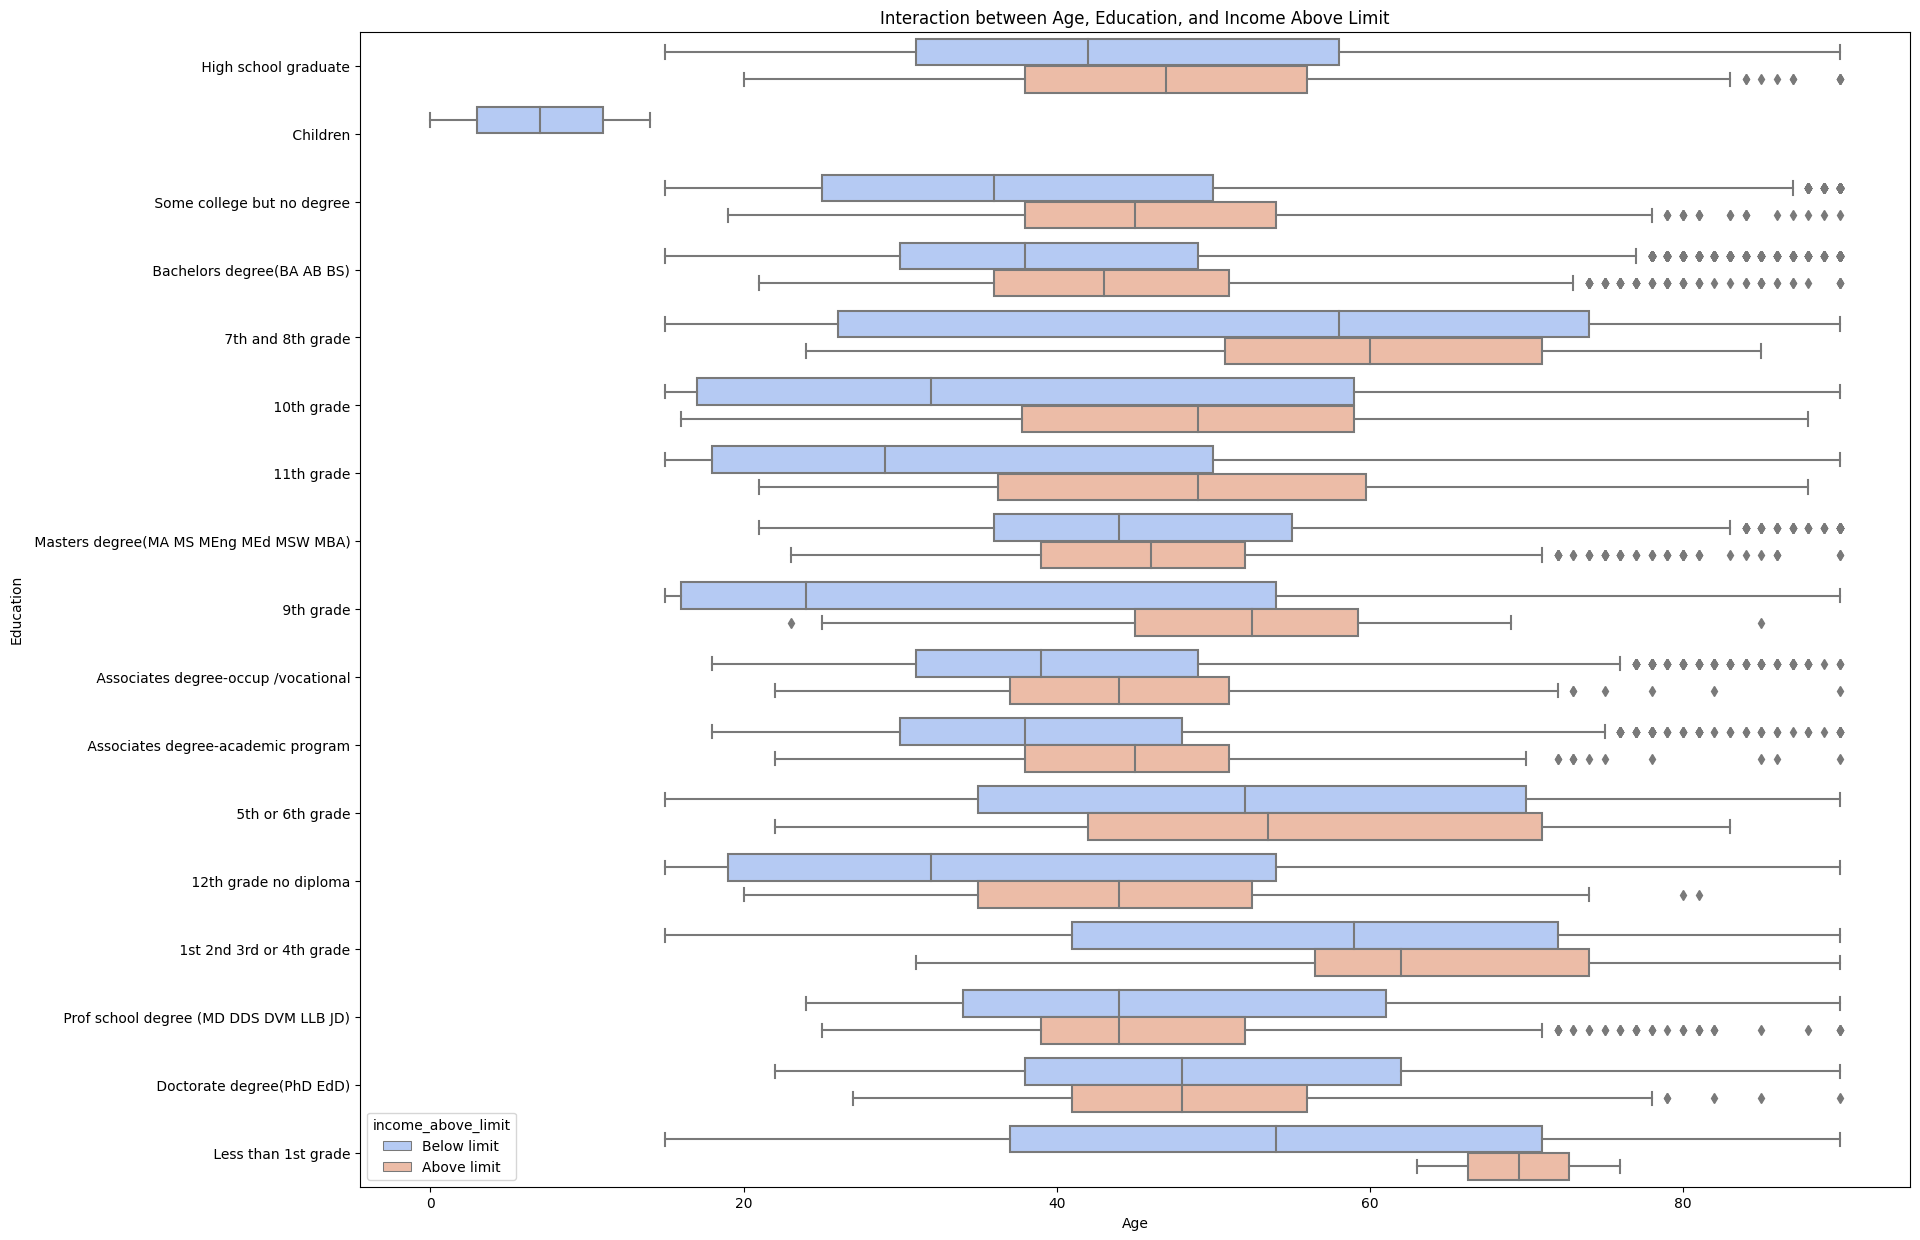

In [23]:
plt.figure(figsize=(20, 15))

# boxplot for age vs education segmented by income_above_limit
sns.boxplot(x='age', y='education', hue='income_above_limit', data=df, 
            order=df['education'].value_counts().index, palette='coolwarm')

plt.title('Interaction between Age, Education, and Income Above Limit')
plt.xlabel('Age')
plt.ylabel('Education')

plt.show()




<div style="background-color: #8DC4C2; padding: 10px; border-radius: 5px;">
    <h2 style="color: Black;">Observations</h1>
    <p style="color: black;">  </p>
    <p style="color: black;">- the dataset seems fairly balanced between male and female individuals </p>
    <p style="color: black;">- as you would probably expect, the number of people decrease as the level or education goes up  </p>
    <p style="color: black;">- the majority of inividuals in the dataset are white   </p>
    <p style="color: black;">- Across most education levels, the median age for individuals with income "Above limit" is generally higher than those "Below limit". This trend is particularly pronounced in categories like "Doctorate degree(PhD EdD)" and "Prof school degree (MD DDS DVM LLB JD)"  </p>
    <p style="color: black;">- Individuals with higher education levels like "Doctorate degree(PhD EdD)" and "Prof school degree (MD DDS DVM LLB JD)" are generally older and more likely to have incomes "Above limit"  </p>
    <p style="color: black;">- looking at the violin plot, in the "Above limit" income category, the median age for males is slightly higher than for females. This could imply that older males are more likely to have incomes above the limit compared to females  </p>
    <p style="color: black;">- there is a much higher percentage of children and high school graduates compared to people with higher educational qualifications  </p>
    <p style="color: black;">  </p>
 
   
</div>

<div style="background-color: #8DC4C2; padding: 10px; border-radius: 5px;">
    <h1 style="font-weight: bold; color: blackbold; color: Black;">Preprocessing</h1>
</div>

<div style="background-color: #8DC4C2; padding: 10px; border-radius: 5px; color: black;">
    <p> - right off the bat, we know we're going to have to encode the columns since we're dealing with categorical data  </p>
    <p> - we also need to impute the missing values with the mode (for categorical columns) and the mean (for numerical columns)  </p>
    <p> - we're also going to split the data set into train/validation/test sets first so that there's no kind of data leakage while performing any preprocessing steps  </p>
    <p> - since the target variable is highly imbalanced, we also need to oversample the minority class (again, only for the training data)  <p>
</div>


- note that the columns that need to be imputed are the following: country_of_birth_father, country_of_birth_mother, country_of_birth_own, is_hispanic	
- they are all categorical columns 
- right off the bat, one hot encoding doesn't seem like a viable option since it would create too many new columns (leading to a sparse data set) 

In [24]:
# getting the target column and the rest of the dataset 
y = df['income_above_limit']
X = df.drop('income_above_limit', axis=1)

In [25]:
# splitting the data set into train, validation, test sets

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Now, let's split the temp data into validation (15%) and test data (15%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [26]:
X_val.columns

Index(['age', 'gender', 'education', 'marital_status', 'race', 'is_hispanic',
       'employment_commitment', 'employment_stat', 'wage_per_hour',
       'working_week_per_year', 'industry_code', 'industry_code_main',
       'occupation_code', 'total_employed', 'household_stat',
       'household_summary', 'vet_benefit', 'tax_status', 'gains', 'losses',
       'stocks_status', 'citizenship', 'mig_year', 'country_of_birth_own',
       'country_of_birth_father', 'country_of_birth_mother',
       'importance_of_record'],
      dtype='object')

In [27]:
# let's use a label encoder for columns with categorical data 

categorical_columns_list = [
    'gender',
    'education',
    'marital_status',
    'race',
    'is_hispanic',
    'employment_commitment',
    'industry_code_main',
    'household_stat',
    'household_summary',
    'tax_status',
    'citizenship',
    'country_of_birth_own',
    'country_of_birth_father',
    'country_of_birth_mother'
]

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

for col in categorical_columns_list:
    X_val[col] = label_encoder.fit_transform(X_val[col])
    X_test[col] = label_encoder.fit_transform(X_test[col])
    X_train[col] = label_encoder.fit_transform(X_train[col])



In [28]:
# encoding the target variable as well 

y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)  
y_test = label_encoder.transform(y_test)  


In [29]:
# we can see that the data is all numerical now 
X_train.head()

,age,gender,education,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,...,tax_status,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,importance_of_record
163801,10,1,10,4,4,0,0,0,0,0,...,4,0,0,0,4,94,41,41,41,1790.58
84788,25,0,0,5,4,0,5,0,0,0,...,4,0,0,0,4,95,41,41,41,977.90
132530,6,0,10,4,4,0,0,0,0,0,...,4,0,0,0,4,94,41,41,41,1704.41
16816,34,1,7,2,4,0,1,0,900,52,...,2,0,0,0,4,95,41,41,41,1839.22
195177,52,1,12,2,4,0,1,0,1200,52,...,2,0,0,0,4,95,41,41,41,3048.60


In [30]:
# using SMOTE to upsample the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)

X_train, y_train = smote.fit_resample(X_train, y_train)


<div style="background-color: #8DC4C2; padding: 10px; border-radius: 5px;">
    <h1 style="font-weight: bold; color: blackbold; color: Black;">Modeling </h1>
</div>




<div style="background-color: #8DC4C2; padding: 10px; border-radius: 5px;">
    <h2 style="color: Black;">Baseline Modeling</h1>
    <p style="color: black;">  </p>
   
 
   
</div>

In [31]:
# baseline modeling 
logistic_model = LogisticRegression(random_state=42)
gradient_boosting_model = GradientBoostingClassifier(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)



In [32]:
# training

# Logistic Regression
logistic_model.fit(X_train, y_train)

# Gradient Boosting
gradient_boosting_model.fit(X_train, y_train)

# Random Forest
random_forest_model.fit(X_train, y_train)


/Users/narengarapati/opt/anaconda3/envs/pysnowpark/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier(random_state=42)

In [33]:
# Logistic Regression
y_pred_val_logistic = logistic_model.predict(X_val)
f1_logistic = f1_score(y_val, y_pred_val_logistic)

# Gradient Boosting
y_pred_val_gb = gradient_boosting_model.predict(X_val)
f1_gb = f1_score(y_val, y_pred_val_gb)

# Random Forest
y_pred_val_rf = random_forest_model.predict(X_val)
f1_rf = f1_score(y_val, y_pred_val_rf)

print(f'F1 Score (Logistic Regression): {f1_logistic}')
print(f'F1 Score (Gradient Boosting): {f1_gb}')
print(f'F1 Score (Random Forest): {f1_rf}')


F1 Score (Logistic Regression): 0.8844799160671463
F1 Score (Gradient Boosting): 0.9487682657602412
F1 Score (Random Forest): 0.9601089035548739


- the models seem to be doing a pretty good job (especially random forest)
- let's see how they do on the test set
- I was going to use the validation set for cross validation for hyperparameters but the models already seem to be working pretty well  

In [34]:
# Logistic Regression
y_pred_test_logistic = logistic_model.predict(X_test)
f1_logistic_test = f1_score(y_test, y_pred_test_logistic)

# Gradient Boosting
y_pred_test_gb = gradient_boosting_model.predict(X_test)
f1_gb_test = f1_score(y_test, y_pred_test_gb)

# Random Forest
y_pred_test_rf = random_forest_model.predict(X_test)
f1_rf_test = f1_score(y_test, y_pred_test_rf)

print(f'F1 Score on Test Set (Logistic Regression): {f1_logistic_test}')
print(f'F1 Score on Test Set (Gradient Boosting): {f1_gb_test}')
print(f'F1 Score on Test Set (Random Forest): {f1_rf_test}')

F1 Score on Test Set (Logistic Regression): 0.8847270343665137
F1 Score on Test Set (Gradient Boosting): 0.9462796129462797
F1 Score on Test Set (Random Forest): 0.9589352825569769
